In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset loading (replace with your own dataset)
file_path = r"C:\Users\DCC\Desktop\anaconda\Employee_Retention_Enhanced_Dataset (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows to verify it's loaded correctly
df.head()

,Name,Gender,Education,Marital Status,Department,Job Role,Job Level,OverTime,Job Satisfaction,Monthly Income,Years at Company,Environment Satisfaction,Performance Rating,Years in Current Role,Employee Engagement Score,Work Hours Per Day,Attrition
0,Vivaan Patel,Female,Bachelor,Single,Sales,Sales Executive,5,Yes,4,4041,1,1,2,3,65,10,Yes
1,Aarav Kapoor,Male,PhD,Single,Research & Development,Human Resources,3,Yes,2,16848,21,3,2,3,98,8,Yes
2,Vivaan Sharma,Female,High School,Married,Research & Development,Human Resources,3,Yes,4,7090,24,1,3,10,80,12,No
3,Diya Bose,Male,High School,Single,Human Resources,Research Scientist,3,Yes,2,6309,24,3,4,10,47,7,Yes
4,Diya Desai,Male,Master,Divorced,Human Resources,Sales Executive,5,Yes,2,8354,29,4,3,10,89,10,No


In [5]:
# Rename columns: remove spaces and convert to lowercase
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Drop duplicate rows
df = df.drop_duplicates()

# Convert selected columns to 'category' data type
cat_cols = ['gender', 'education', 'marital_status', 'department', 'job_role', 'overtime', 'attrition']
df[cat_cols] = df[cat_cols].astype('category')

# Remove rows with invalid work hours (e.g., <= 0 or > 24)
df = df[(df['work_hours_per_day'] > 0) & (df['work_hours_per_day'] <= 24)]

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_employee_data.csv", index=False)

# Print final shape of the cleaned DataFrame
print("Cleaned data shape:", df.shape)

Cleaned data shape: (2500, 17)


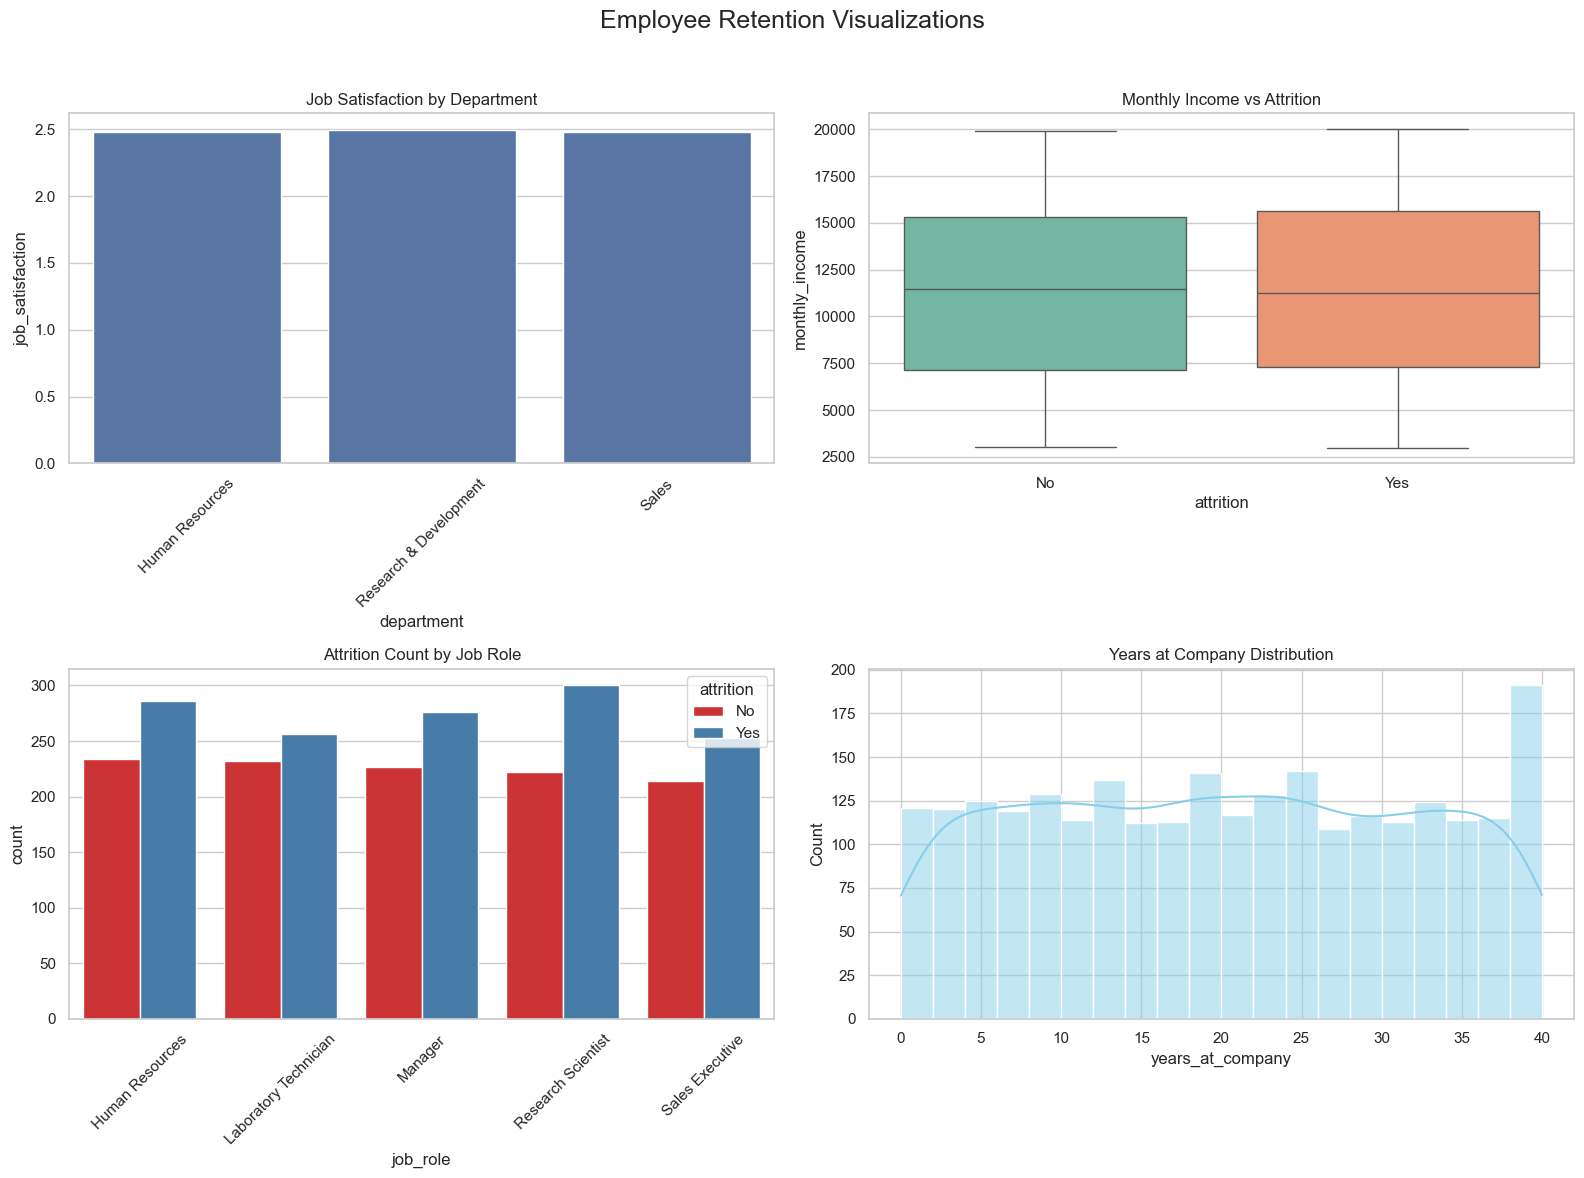

In [16]:
# Corrected version of the plotting code
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Employee Retention Visualizations", fontsize=18)

# Plot 1: Job Satisfaction by Department
sns.barplot(data=df, x="department", y="job_satisfaction", ax=axs[0, 0], estimator=np.mean, errorbar=None)
axs[0, 0].set_title("Job Satisfaction by Department")
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Monthly Income by Attrition
sns.boxplot(data=df, x="attrition", hue="attrition" , y="monthly_income", ax=axs[0, 1], palette="Set2" , legend=False)
axs[0, 1].set_title("Monthly Income vs Attrition")

# Plot 3: Job Role count by Attrition
sns.countplot(data=df, x="job_role", hue="attrition", ax=axs[1, 0], palette="Set1")
axs[1, 0].set_title("Attrition Count by Job Role")
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Years at Company distribution
sns.histplot(data=df, x="years_at_company", bins=20, kde=True, ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title("Years at Company Distribution")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

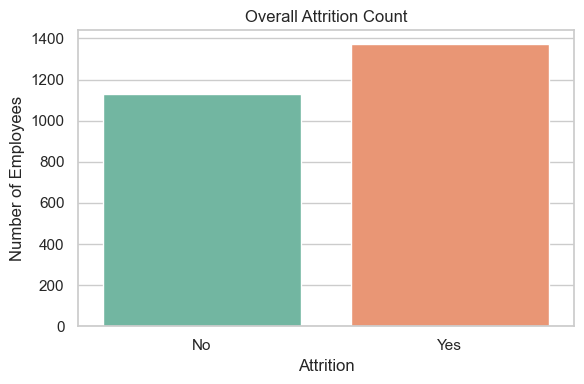

In [17]:
# Set plot style
sns.set(style="whitegrid")

# 1. Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='attrition', hue='attrition', palette='Set2', legend=False)
plt.title("Overall Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

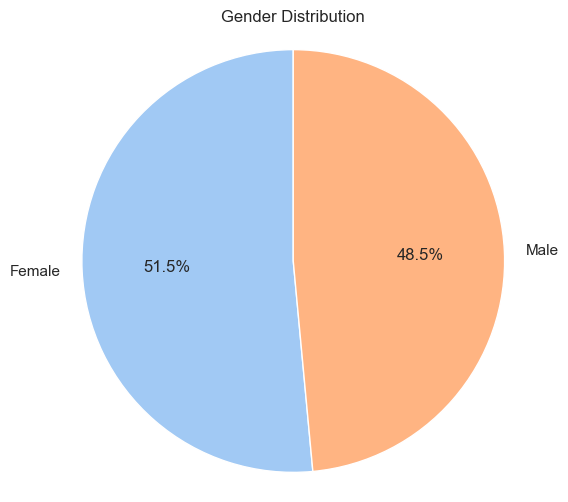

In [21]:
# Count gender values
gender_counts = df['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Gender Distribution")
plt.axis('equal')  # Ensure pie is a circle
plt.show()